In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("Pokemon.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [4]:
df.isnull().all(1)

0      False
1      False
2      False
3      False
4      False
       ...  
795    False
796    False
797    False
798    False
799    False
Length: 800, dtype: bool

In [5]:
# drop columns with no data
df.dropna(axis=1, how="all", inplace=True)

In [6]:
# print columns with nan
for i in df.columns:
    nans = df[i].isnull().sum(axis = 0)
    # print(nans, nans == 0, type(nans))
    if nans != 0:
        print(f"{i}: {df[i].isnull().sum(axis = 0)}")

Type 2: 386


In [7]:
# 4. Prepare the dataset (For example, handle the NAN values).

# replace nan with col mean()
df['Type 2'] = df['Type 2'].replace(np.nan, df['Type 2'].mean)

In [8]:
# 5. Find the columns that have the greatest correlation with the target column (TOP 7) and
# create a smaller dataset including only these columns and the target one.

# get highest correlation
from itertools import combinations

cols = ["Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Generation", "Legendary",]
combinations_list = list(combinations(cols, 2))

cor_dict = {}
for i in combinations_list:
    correlation = df[i[0]].corr(df[i[1]])
    if correlation > .01:
        cor_dict[i] = correlation

# sort dict by value
cor_sort_dict = dict(sorted(cor_dict.items(), key=lambda x: x[1], reverse=True))

for k, v in cor_sort_dict.items():
    print(k, v)


('Total', 'Sp. Atk') 0.7472498608443279
('Total', 'Attack') 0.7362106519949296
('Total', 'Sp. Def') 0.7176094700519231
('Total', 'HP') 0.6187483543135464
('Total', 'Defense') 0.6127874293532541
('Total', 'Speed') 0.5759426553220425
('Defense', 'Sp. Def') 0.5107465890885576
('Sp. Atk', 'Sp. Def') 0.5061214206155492
('Total', 'Legendary') 0.5017583833882701
('Sp. Atk', 'Speed') 0.4730178836686987
('Sp. Atk', 'Legendary') 0.44890725643865786
('Attack', 'Defense') 0.43868705511848954
('HP', 'Attack') 0.422386028776223
('Attack', 'Sp. Atk') 0.3963617553492319
('Attack', 'Speed') 0.3812397392410898
('HP', 'Sp. Def') 0.37871806861256385
('Sp. Def', 'Legendary') 0.36393711674569007
('HP', 'Sp. Atk') 0.3623798574071565
('Attack', 'Legendary') 0.34540797555552816
('Speed', 'Legendary') 0.32671529483090583
('HP', 'Legendary') 0.2736195577129523
('Attack', 'Sp. Def') 0.26398955110108846
('Sp. Def', 'Speed') 0.259133113916808
('Defense', 'Legendary') 0.24637680045403446
('HP', 'Defense') 0.23962231

In [9]:
# get 1st 7 elements
top7 = []
for i in list(cor_sort_dict.keys())[0:7]:
    top7.append(i[0])
    top7.append(i[1])

# remove dublicates
top7 = list(set(top7))
print(top7)

# add name??
top7.append("Name")

['Total', 'Sp. Atk', 'Defense', 'Speed', 'HP', 'Sp. Def', 'Attack']


In [10]:
# make copy of original df, delete all but top 7 + name
df2 = df[:]
for col in df2.columns:
    if col not in top7:
        print(col)
        df2 = df2.drop(col, axis=1)
df2

#
Type 1
Type 2
Generation
Legendary


,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,318,45,49,49,65,65,45
1,Ivysaur,405,60,62,63,80,80,60
2,Venusaur,525,80,82,83,100,100,80
3,VenusaurMega Venusaur,625,80,100,123,122,120,80
4,Charmander,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...
795,Diancie,600,50,100,150,100,150,50
796,DiancieMega Diancie,700,50,160,110,160,110,110
797,HoopaHoopa Confined,600,80,110,60,150,130,70
798,HoopaHoopa Unbound,680,80,160,60,170,130,80


Text(0.5, -0.3, 'Total/HP')

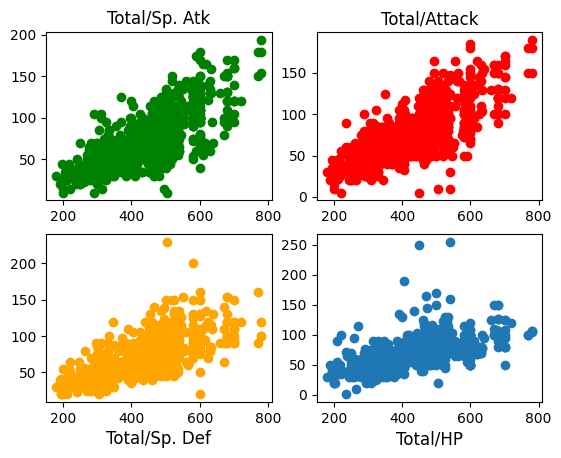

In [11]:
# 6. Plot some semnificative data tha you consider relevant to be shown (at least 3). Defend
# your choice.

# ('Total', 'Sp. Atk') 	    0.7472498608443279
# ('Total', 'Attack') 	    0.7362106519949296
# ('Total', 'Sp. Def') 	    0.7176094700519231
# ('Total', 'HP') 		    0.6187483543135464
# ('Total', 'Defense') 	    0.6127874293532541
# ('Total', 'Speed') 	    0.5759426553220425
# ('Defense', 'Sp. Def')    0.5107465890885576
# ('Sp. Atk', 'Sp. Def')    0.5061214206155492

# plt.scatter(df2["Total"], df2["Attack"])
# plt.scatter(df2["Total"], df2["Attack"])

fig, axs = plt.subplots(2, 2)

axs[0, 0].scatter(df2["Total"], df2["Sp. Atk"], color="green")
axs[0, 0].set_title('Total/Sp. Atk')

axs[0, 1].scatter(df2["Total"], df2["Attack"], color="red")
axs[0, 1].set_title('Total/Attack')

axs[1, 0].scatter(df2["Total"], df2["Sp. Def"], color="orange")
axs[1, 0].set_title('Total/Sp. Def',y=-.3)

axs[1, 1].scatter(df2["Total"], df2["HP"])
axs[1, 1].set_title('Total/HP',y=-.3)


### There is "almost" linear correlation, strongest correlation being 'Total' and 'Sp. Atk' w/correlation value of 0.74.
### 2nd strongest correlation is between 'Total' and 'Attack'.
### To sum it all up, the higher 'Special Attack' the higher 'Total' score is, followed by 'Attack', 'Sp. Def', 'HP', 'Defense', 'Speed' and so on.

### Identifying the outliers Using visualizations method

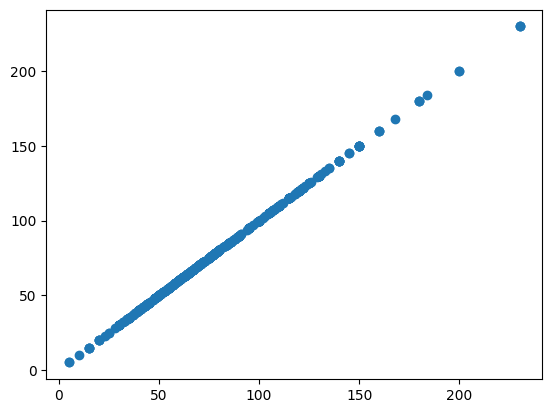

In [12]:
plt.scatter(df2["Defense"],df2["Defense"])

### Identifying the outliers with interquartile range method

In [13]:
def interquartile_range_method(df_col):
    sort_df_col = df_col.sort_values()

    q1 = sort_df_col.quantile(0.25)
    q3 = sort_df_col.quantile(0.75)

    iqr = q3 - q1

    upper_fence = q3 + (1.5 * iqr)
    lower_fence = q1 - (1.5 * iqr)

    outliers = ((sort_df_col < lower_fence) | (sort_df_col > upper_fence)).sum()

    print(f"interquartile_range [{sort_df_col.name}] outliers: {outliers}")
    return outliers
# interquartile_range_method(df2["Attack"])


In [14]:
# interquartile_range_method(df2["Total"])
interquartile_range_method(df2["HP"])
interquartile_range_method(df2["Attack"])
interquartile_range_method(df2["Defense"])
interquartile_range_method(df2["Sp. Atk"])
interquartile_range_method(df2["Sp. Def"])
interquartile_range_method(df2["Speed"])

interquartile_range [HP] outliers: 19
interquartile_range [Attack] outliers: 7
interquartile_range [Defense] outliers: 13
interquartile_range [Sp. Atk] outliers: 10
interquartile_range [Sp. Def] outliers: 7
interquartile_range [Speed] outliers: 2


2

In [15]:
# from sklearn.ensemble import IsolationForest
# import numpy as np
# np.random.seed(1)
# random_data = np.random.randn(50000,2)  * 20 + 20

# clf = IsolationForest( behaviour = 'new', max_samples=100, random_state = 1, contamination= 'auto')
# preds = clf.fit_predict(random_data)
# preds

### Identifying the outliers Using Statistical outlier detection

In [16]:
def statistical_outlier_detection(df_col, get=False):
    data = df_col.to_numpy()
    # print(data.to_numpy())

    mean = np.mean(data)
    sigma = np.std(data)     # standard deviation
    threshold = 3

    z = (data - mean)
    z /= sigma

    outliers = data[z > threshold]

    print(f"statistical_outlier [{df_col.name}] outliers: {len(outliers)}")
    if get == False:
        return len(outliers)
    else:
        return outliers



In [17]:
# statistical_outlier_detection(df2["Total"])
statistical_outlier_detection(df2["HP"])
statistical_outlier_detection(df2["Attack"])
statistical_outlier_detection(df2["Defense"])
statistical_outlier_detection(df2["Sp. Atk"])
statistical_outlier_detection(df2["Sp. Def"])
statistical_outlier_detection(df2["Speed"])

statistical_outlier [HP] outliers: 10
statistical_outlier [Attack] outliers: 5
statistical_outlier [Defense] outliers: 10
statistical_outlier [Sp. Atk] outliers: 5
statistical_outlier [Sp. Def] outliers: 4
statistical_outlier [Speed] outliers: 2


2

### Identifying the outliers using Boxplots

<Axes: >

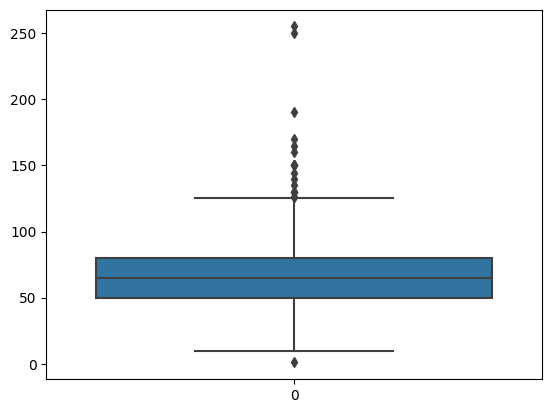

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df2["HP"])

In [19]:
# from sklearn.ensemble import IsolationForest
# import numpy as np
# np.random.seed(1)
# random_data = np.random.randn(50000,2)  * 20 + 20
# random_data = df2["HP"]
# clf = IsolationForest(  max_samples=100, random_state = 1, contamination= 'auto')
# preds = clf.fit_predict(random_data)
# preds

statistical_outlier [HP] outliers: 10
statistical_outlier [Attack] outliers: 5
statistical_outlier [Defense] outliers: 10
interquartile_range [HP] outliers: 19
interquartile_range [Attack] outliers: 7
interquartile_range [Defense] outliers: 13


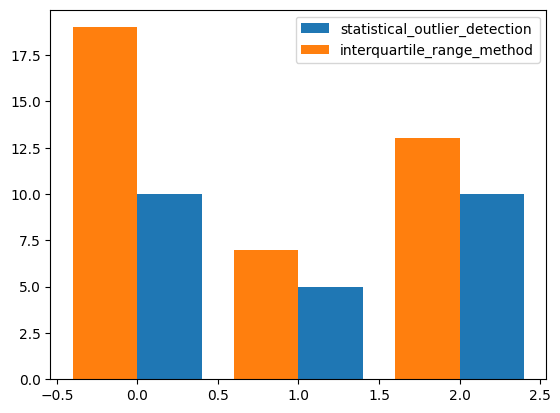

In [20]:
stat = [
    statistical_outlier_detection(df2["HP"]),
    statistical_outlier_detection(df2["Attack"]),
    statistical_outlier_detection(df2["Defense"]),
]
inter = [
    interquartile_range_method(df2["HP"]),
    interquartile_range_method(df2["Attack"]),
    interquartile_range_method(df2["Defense"]),
]
x = np.arange(len(stat))
plt.bar(x+.2, stat, width=.4, label="statistical_outlier_detection")
plt.bar(x-.2, inter, width=.4, label="interquartile_range_method")
plt.legend()

In [21]:
# [-] not working, cannot change value by index
# 10. Modify the contamination value for each algorithm, plot thegraph of dependence of the
# outliers number on it and make some cocnclusions.

outliners = statistical_outlier_detection(df2["HP"], True)

print(outliners)

# for new_value, index in zip(outliners, df.index):
#     print()
#     print(new_value)
#     print(index)
#     df2.at[index, 'HP'] = 9999

indx = [df2[df2['HP'] == i].index.astype('int8') for i in outliners]
print(indx)
for i in indx:
    print()
    print(i, i[0], type(i))
    column_index = df.columns.get_loc('HP')
    # df2.at[i,'HP'] = [999.9]

    # value doesn't want to change
    print(df2.iloc[i, column_index])
    df2.iloc[i, column_index] = np.nan
    print(df2.iloc[i, column_index])

# for i in outliners:
#     print()
#     print(f"i    {i}")

#     indx = indx.astype('int64')
#     column_index = df.columns.get_loc('HP')

#     print(f"indx         {indx} {type((indx))}")
#     print(f"column_index {column_index} ")
#     print(df2.iloc[df2[df2['HP'] == i].index])
    
#     # df2.at[indx,'HP'] = [999.9]
#     # df2.iloc[indx]['HP'] = 9999
    
#     print(f"hp {df2.iloc[indx]['HP']}")

#     # df2.iloc[indx, column_index] = 999
#     df2.at[indx,"HP"]
    
#     print(f"hp {df2.iloc[indx]['HP']}")

df2["HP"].max()
# df2["HP"]

statistical_outlier [HP] outliers: 10
[250 160 190 255 150 170 150 150 150 165]
[Index([121], dtype='int8'), Index([-101], dtype='int8'), Index([-39], dtype='int8'), Index([5], dtype='int8'), Index([57, -39, 32, 33], dtype='int8'), Index([95], dtype='int8'), Index([57, -39, 32, 33], dtype='int8'), Index([57, -39, 32, 33], dtype='int8'), Index([57, -39, 32, 33], dtype='int8'), Index([-113], dtype='int8')]

Index([121], dtype='int8') 121 <class 'pandas.core.indexes.base.Index'>
121    35
Name: Sp. Atk, dtype: int64
121   NaN
Name: Sp. Atk, dtype: float64

Index([-101], dtype='int8') -101 <class 'pandas.core.indexes.base.Index'>
699    90.0
Name: Sp. Atk, dtype: float64
699   NaN
Name: Sp. Atk, dtype: float64

Index([-39], dtype='int8') -39 <class 'pandas.core.indexes.base.Index'>
761    97.0
Name: Sp. Atk, dtype: float64
761   NaN
Name: Sp. Atk, dtype: float64

Index([5], dtype='int8') 5 <class 'pandas.core.indexes.base.Index'>
5    80.0
Name: Sp. Atk, dtype: float64
5   NaN
Name: Sp. At

255

In [22]:
# 11. Try to come up with some methods of outliers removing. Test your guesses and make some
# relevant conclusions.

# delete outliners
outliners = statistical_outlier_detection(df2["HP"], True)

print(outliners)

for i in outliners:
    # print()
    # print(i)
    # print( df2[df2["HP"] == i] )
    # print( df2[df2["HP"] == i].index )

    df2.drop(df2[df2['HP'] == i].index, inplace = True)

    # print(df2["HP"].iloc[i])

statistical_outlier_detection(df2["HP"])
# df2["HP"].iloc[]
# print( df2.iloc[250] )

statistical_outlier [HP] outliers: 10
[250 160 190 255 150 170 150 150 150 165]
statistical_outlier [HP] outliers: 3


3

In [23]:
# . Create a table that shows thenumber of outliers in dependence of the used algorithm. Try to
# identify the most accurate one in your opinion.

data = [
    ["HP", 
        statistical_outlier_detection(df2["HP"]),
        interquartile_range_method(df2["HP"]),
    ],
    ["Attack", 
        statistical_outlier_detection(df2["Attack"]),
        interquartile_range_method(df2["Attack"]),
    ],
    ["Defense", 
        statistical_outlier_detection(df2["Defense"]),
        interquartile_range_method(df2["Defense"]),
    ],
    ["Sp. Atk", 
        statistical_outlier_detection(df2["Sp. Atk"]),
        interquartile_range_method(df2["Sp. Atk"]),
    ],
    ["Sp. Def", 
        statistical_outlier_detection(df2["Sp. Def"]),
        interquartile_range_method(df2["Sp. Def"]),
    ],
    ["Speed", 
        statistical_outlier_detection(df2["Speed"]),
        interquartile_range_method(df2["Speed"]),
    ],
]

df3 = pd.DataFrame(data, columns=["col","statistical","interquartile"])
df3

statistical_outlier [HP] outliers: 3
interquartile_range [HP] outliers: 9
statistical_outlier [Attack] outliers: 5
interquartile_range [Attack] outliers: 7
statistical_outlier [Defense] outliers: 10
interquartile_range [Defense] outliers: 13
statistical_outlier [Sp. Atk] outliers: 0
interquartile_range [Sp. Atk] outliers: 10
statistical_outlier [Sp. Def] outliers: 4
interquartile_range [Sp. Def] outliers: 7
statistical_outlier [Speed] outliers: 2
interquartile_range [Speed] outliers: 2


,col,statistical,interquartile
0,HP,3,9
1,Attack,5,7
2,Defense,10,13
3,Sp. Atk,0,10
4,Sp. Def,4,7
5,Speed,2,2
